In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from icecream import ic

from svreg.svreg import SvRegression

# Fixing numpy random seed (used by sklearn) for reproducibility:
np.random.seed(seed=4242)

# Autoreload of the module.
%load_ext autoreload
%autoreload 2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
name_dataset = "mtcars.csv"
path_dataset = os.path.join("data", name_dataset)
index_col = "model"
target = "mpg"

data_sv = pd.read_csv(path_dataset,
                      index_col=index_col)

In [3]:
# Splitting dataset in features and target.
x_features = data_sv.drop(labels=target, axis=1)
y_target = data_sv[target]

nb_rows, nb_features = x_features.shape
print(f"{nb_rows} rows in the dataset.")
print(f"{nb_features} features in the dataset.")

32 rows in the dataset.
10 features in the dataset.


In [4]:
sv_reg = SvRegression(
    data=data_sv,
    #regressors_selected=["cyl", "disp", "hp", "drat", "vs", "am"],
    target=target,
)

# Fitting the regression.
coeffs = sv_reg.fit()

# Coefficients without noise:
coeffs_sv_without_noise = sv_reg.coeffs

0 rows have been deleted due to missing values.
32 rows in the dataset.
10 features (regressors) present in the dataset.
10 features have been selected.
Computing the 1024 linears regressions.
Linear regressions |████████████████████████████████████████⚠︎ (!) 1023/1024 [100%] in 0.7s (1421.87/s) 


In [5]:
print("=" * 70)
print("Per predictor Shapley value (normalized basis).")
print(sv_reg.shaps)
print("=" * 70)
print("Coefficients of the SV regression (normalized basis).")
print(sv_reg.coeffs_norm)
print("=" * 70)
print("Coefficients of the SV regression (unnormalized basis).")
print("sv_reg.coeffs[0] --> intercept term.")
print(sv_reg.coeffs)
print("=" * 70)
print("Checking that the Shapley Values sums up to the full model R^2.")
print(sv_reg.check_norm_shap())
print("=" * 70)

Per predictor Shapley value (normalized basis).
[('wt', 0.03827072937974526), ('disp', 0.04409331639936167), ('drat', 0.06588051899996777), ('cyl', 0.06726590503285149), ('vs', 0.07327014306617548), ('hp', 0.07337622664887265), ('am', 0.10698627193131996), ('gear', 0.12023870212756886), ('carb', 0.12134515464152582), ('qsec', 0.1582887962503759)]
Coefficients of the SV regression (normalized basis).
[('carb', -0.22025709191629558), ('hp', -0.09453648114544219), ('cyl', -0.07893558764124148), ('disp', -0.05202435802503294), ('wt', -0.0441080110646224), ('drat', 0.09671643566759991), ('vs', 0.11034013362113926), ('am', 0.1783602664307249), ('gear', 0.2503487780744625), ('qsec', 0.3780626520856265)]
Coefficients of the SV regression (unnormalized basis).
sv_reg.coeffs[0] --> intercept term.
[('intercept', -196.21723005803858), ('carb', -0.8218660657920691), ('wt', -0.2716895796256413), ('cyl', -0.26638385115510543), ('hp', -0.008310131612705619), ('disp', -0.0025298645125850627), ('drat',

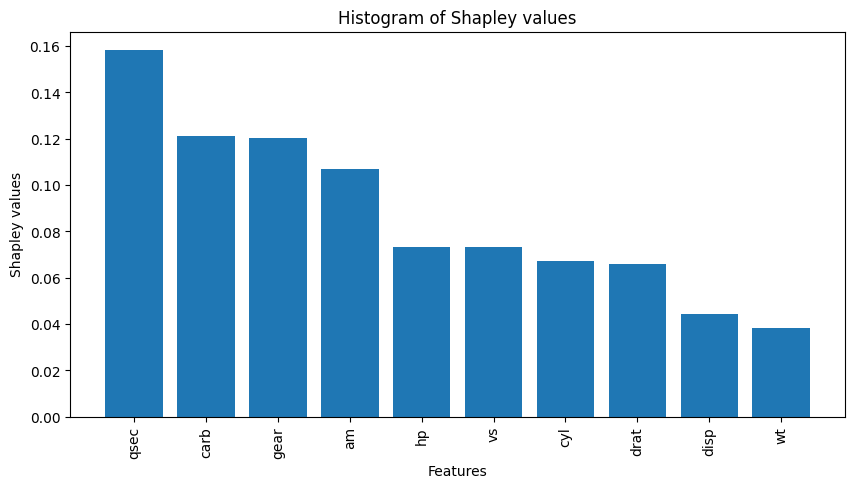

In [6]:
sv_reg.histo_shaps()